In [1]:
# !pip install --upgrade pip

In [2]:
# !pip install indic-nlp-library

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from indicnlp.tokenize import indic_tokenize
from collections import Counter
import nltk
from nltk.corpus import stopwords

In [4]:
# Load the JSON data
with open('../../Dataset/test-B.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [5]:
# Extract domains, contexts, and QAs
domains = data['domains']

In [6]:
# Create lists to store data
contexts = []
questions = []
answers = []
domain_names = []

In [7]:
for domain in domains:
    domain_name = domain['domain']
    for context in domain['contexts']:
        for qa in context['qas']:
            domain_names.append(domain_name)
            contexts.append(context['context'])
            questions.append(qa['question'])
            answers.append(qa['answer'])

In [8]:
# Create a Pandas DataFrame
df = pd.DataFrame({
    'Domain': domain_names,
    'Context': contexts,
    'Question': questions,
    'Answer': answers
})

In [9]:
df.head()

,Domain,Context,Question,Answer
0,kund,"आदिकेशव कुंड, जो वाराणसी के प्राचीन राजघाट के ...",आदिकेशव कुंड किन नदियों के संगम पर स्थित है और...,
1,kund,"आदिकेशव कुंड, जो वाराणसी के प्राचीन राजघाट के ...",आदिकेशव कुंड का संबंध किस देवता से है और श्रद्...,
2,kund,"आदिकेशव कुंड, जो वाराणसी के प्राचीन राजघाट के ...",आदिकेशव कुंड को वाराणसी की धार्मिक विरासत में ...,
3,kund,"आदिकेशव कुंड, जो गंगा और वरुणा नदियों के पावन ...",आदिकेशव कुंड को धार्मिक दृष्टि से अत्यंत पवित्...,
4,kund,"आदिकेशव कुंड, जो गंगा और वरुणा नदियों के पावन ...",भगवान विष्णु से जुड़ाव के कारण आदिकेशव कुंड का...,


In [10]:
df.to_csv('test-B.csv', index=False)

In [11]:
# Perform analysis

## 1. Domain Distribution
domain_dist = df['Domain'].value_counts()
print("Domain Distribution:")
print(domain_dist)

Domain Distribution:
Domain
temple         299
travel         222
aashram        172
general_qna    133
kund           124
museum         115
cruise          48
aarti           40
foodcourt       25
toilet          18
Name: count, dtype: int64


In [12]:
## 2. Context Length Distribution
context_len = df['Context'].apply(len)
print("Average Context Length:", context_len.mean())

Average Context Length: 546.9615384615385


In [13]:
## 3. Question Length Distribution
question_len = df['Question'].apply(len)
print("Average Question Length:", question_len.mean())

Average Question Length: 91.77759197324414


In [14]:
## 4. Answer Length Distribution
answer_len = df['Answer'].apply(len)
print("Average Answer Length:", answer_len.mean())

Average Answer Length: 0.0


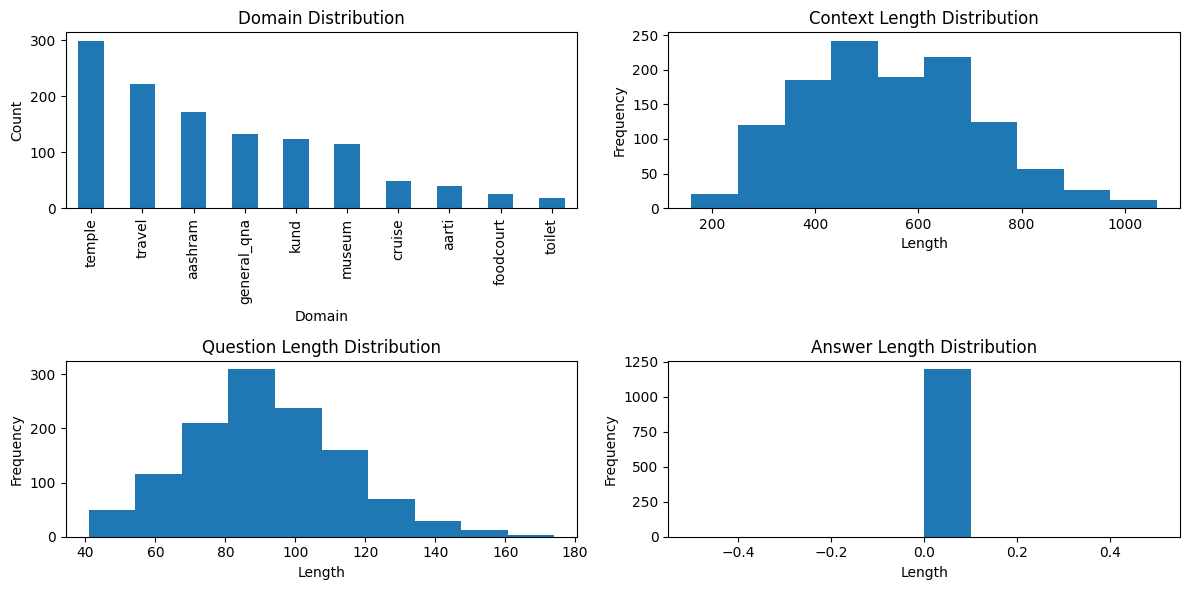

In [15]:
# Plot graphs
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
domain_dist.plot(kind='bar')
plt.title('Domain Distribution')
plt.xlabel('Domain')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
plt.hist(context_len, bins=10)
plt.title('Context Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(question_len, bins=10)
plt.title('Question Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(answer_len, bins=10)
plt.title('Answer Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [16]:
len(df['Question']), len(set(df['Context']))

(1196, 430)